In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import glob
import ast
import datetime
import json
import seaborn as sns
import chart_studio.plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy import stats
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller # for Dickey Fuller test
from statsmodels.tsa.stattools import acf, pacf # for p,q in Arima Model
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [35]:
sam = pd.read_csv("C:/Users/lohitr/Desktop/Bits_Data_Visualze/2 Semester/complaint_data.csv")

In [3]:
sam

,Extract Run Date,UniqueRandomComplaintId,Allegation_Id,Allegation_FADO_Type,Allegation,Case_Type,Closed_Year,Days_From_Received_Date_To_Case_Closing,Re_opened,Ever_On_DA_Hold,Complaint_Outcome_Path,Complaint_Disposition,Allegation_Outcome_Path,Allegation_Disposition,Borough_Of_Incident,Patrol_Borough_Of_Incident
0,5/25/2018,1,1,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,5/25/2018,1,2,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,5/25/2018,1,3,Force,Beat,CCRB,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
3,5/25/2018,2,1,Discourtesy,Curse,CCRB,2000,2433,False,False,Truncated,Complaint Withdrawn,Truncated,Complaint Withdrawn,Manhattan,Manhattan North
4,5/25/2018,3,1,Discourtesy,Curse,CCRB,2000,2445,False,False,Other,Miscellaneous,Other,Miscellaneous,Manhattan,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309255,5/25/2018,104705,1,Force,Chokehold,CCRB,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309256,5/25/2018,104705,2,Force,Physical force,CCRB,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309257,5/25/2018,104706,1,Offensive Language,Race,CCRB,2017,25,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn South
309258,5/25/2018,104707,1,Discourtesy,Word,CCRB,2017,14,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Bronx,Bronx


In [4]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309260 entries, 0 to 309259
Data columns (total 16 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Extract Run Date                         309260 non-null  object
 1   UniqueRandomComplaintId                  309260 non-null  int64 
 2   Allegation_Id                            309260 non-null  int64 
 3   Allegation_FADO_Type                     309260 non-null  object
 4   Allegation                               309257 non-null  object
 5   Case_Type                                309260 non-null  object
 6   Closed_Year                              309260 non-null  int64 
 7   Days_From_Received_Date_To_Case_Closing  309260 non-null  int64 
 8   Re_opened                                309260 non-null  bool  
 9   Ever_On_DA_Hold                          309260 non-null  bool  
 10  Complaint_Outcome_Path                   309

In [36]:
sam=sam.drop(['Extract Run Date','UniqueRandomComplaintId','Case_Type'], axis = 1)

In [6]:
sam.head()

,Allegation_Id,Allegation_FADO_Type,Allegation,Closed_Year,Days_From_Received_Date_To_Case_Closing,Re_opened,Ever_On_DA_Hold,Complaint_Outcome_Path,Complaint_Disposition,Allegation_Outcome_Path,Allegation_Disposition,Borough_Of_Incident,Patrol_Borough_Of_Incident
0,1,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,2,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,3,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
3,1,Discourtesy,Curse,2000,2433,False,False,Truncated,Complaint Withdrawn,Truncated,Complaint Withdrawn,Manhattan,Manhattan North
4,1,Discourtesy,Curse,2000,2445,False,False,Other,Miscellaneous,Other,Miscellaneous,Manhattan,Other


In [7]:
sam.columns

Index(['Allegation_Id', 'Allegation_FADO_Type', 'Allegation', 'Closed_Year',
       'Days_From_Received_Date_To_Case_Closing', 'Re_opened',
       'Ever_On_DA_Hold', 'Complaint_Outcome_Path', 'Complaint_Disposition',
       'Allegation_Outcome_Path', 'Allegation_Disposition',
       'Borough_Of_Incident', 'Patrol_Borough_Of_Incident'],
      dtype='object')

In [8]:
sam.dtypes

Allegation_Id                               int64
Allegation_FADO_Type                       object
Allegation                                 object
Closed_Year                                 int64
Days_From_Received_Date_To_Case_Closing     int64
Re_opened                                    bool
Ever_On_DA_Hold                              bool
Complaint_Outcome_Path                     object
Complaint_Disposition                      object
Allegation_Outcome_Path                    object
Allegation_Disposition                     object
Borough_Of_Incident                        object
Patrol_Borough_Of_Incident                 object
dtype: object

In [9]:
sam.describe()

,Allegation_Id,Closed_Year,Days_From_Received_Date_To_Case_Closing
count,309260.000000,309260.000000,309260.000000
mean,2.994193,2008.657017,222.670653
std,2.583432,4.707169,157.810152
min,1.000000,2000.000000,1.000000
25%,1.000000,2005.000000,98.000000
50%,2.000000,2009.000000,172.000000
75%,4.000000,2013.000000,330.000000
max,36.000000,2017.000000,3361.000000


In [10]:
sam.Allegation_Id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [11]:
sam.Allegation_Id.nunique()

36

In [12]:
sam.Allegation_FADO_Type.unique()

array(['Force', 'Discourtesy', 'Offensive Language', 'Abuse of Authority',
       'OMN'], dtype=object)

In [13]:
sam.Allegation_FADO_Type.nunique()

5

In [14]:
sam.Allegation.unique()

array(['Beat', 'Curse', 'Other - Ethnic Slur', 'Word', 'Property damaged',
       'Physical force', 'Chokehold', 'Premises entered and/or searched',
       'Property Damaged', 'Vehicle search',
       'Hit against inanimate object', 'Race', 'Threat of arrest',
       'Gun As Club', 'Nightstick as club (incl asp & baton)',
       'Frisk and/or search', 'Failure to produce stop and frisk report',
       'Question and/or stop', 'Push/Shove',
       'Threat of force (verbal or physical)', 'Gun as club', 'Gun fired',
       'Gun pointed', 'Refusal to obtain medical treatment',
       'Refusal to provide name/shield number', 'Pepper spray',
       'Threat to damage/seize property', 'Other - Force', 'Other',
       'Punch/Kick', 'False official statement', 'Gun pointed/gun drawn',
       'Demeanor/tone', 'Threat to notify ACS', 'Vehicle stop',
       'Person Searched', 'Seizure of property', 'Ethnicity', 'Action',
       'Gun Pointed', 'Threat of summons', 'Retaliatory arrest',
       'Strip-

In [15]:
sam.Allegation.nunique()

107

In [16]:
sam.Closed_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [17]:
sam.Closed_Year.nunique()

18

In [18]:
sam.Days_From_Received_Date_To_Case_Closing.unique()

array([2817, 2433, 2445,  490,  511,  489,  458,  482,  539,  481,  460,
        488,  504,  558,  462,  503,  468,  448,  453,  502,  478,  567,
        483,  564,  225,  497,  533,  476,  563,  492,  435,  447,  471,
        441,  442,  548,  494,  426,  553,  480,  550,  525,  542,  486,
        524,  437,  440,  436,  537,  428,  547,  445,  536,  432,  431,
        457,  455,  415,  430,  450,  443,  424,  454,  422,  433,  531,
        461,  541,  414,  459,  477,  413,  420,  427,  472,  512,  421,
        449,  446,  470,  474,  495,  452,  451,  467,  406,  416,  469,
        401,  400,  398,  417,  419,  412,  397,  528,  444,  439,  403,
        396,  402,  407,  392,  418,  410,  390,  507,  515,  518,  387,
        434,  423,  386,  405,  404,  540,  394,  399,  383,  395,  388,
        380,  475,  499,  393,  491,  500,  379,  498,  371,  389,  385,
        465,  551,  473,  496,  367,  382,  463,  409,  438,  521,  493,
        411,  364,  484,  391,  365,  363,  408,  4

In [19]:
sam.Days_From_Received_Date_To_Case_Closing.nunique()

879

In [20]:
sam.Re_opened.unique()

array([False,  True])

In [21]:
sam.Ever_On_DA_Hold.unique()

array([False,  True])

In [22]:
sam.Complaint_Outcome_Path.unique()

array(['Full Investigation', 'Truncated', 'Other', 'Mediated',
       'Mediation Attempted'], dtype=object)

In [23]:
sam.Complaint_Disposition.unique()

array(['Unsubstantiated', 'Complaint Withdrawn', 'Miscellaneous',
       'Unfounded', 'Exonerated', 'Substantiated (Command Discipline)',
       'Substantiated (Instructions)', 'Officer(s) Unidentified',
       'IAB - Referral', 'Complainant Uncooperative',
       'Substantiated (Charges)', 'Complainant Unavailable', 'Mediated',
       'Miscellaneous - Subject Resigned',
       'Substantiated (No Recommendations)',
       'Alleged Victim Uncooperative', 'Miscellaneous - Subject Retired',
       'Miscellaneous - Subject Terminated', 'Alleged Victim Unavailable',
       'Duplicate - CCRB', 'Mediation Attempted', 'OCD - Staff Referral',
       'Administratively Closed', 'Conciliated', 'Victim Unidentified',
       'Witness Unavailable', 'IAB - Staff Referral',
       'Witness Uncooperative', 'Referral',
       'Substantiated (Formalized Training)',
       'Substantiated (Command Discipline A)',
       'Substantiated (Command Discipline B)',
       'Substantiated (Command Lvl Instructions)

In [24]:
sam.Complaint_Disposition.nunique()

34

In [25]:
sam.Allegation_Outcome_Path.unique()

array(['Full Investigation', 'Truncated', 'Other', 'Mediated',
       'Mediation Attempted'], dtype=object)

In [26]:
sam.Allegation_Disposition.unique()

array(['Unsubstantiated', 'Complaint Withdrawn', 'Miscellaneous',
       'Unfounded', 'Exonerated', 'Officer(s) Unidentified',
       'Other Misconduct (No Rec.)', 'Substantiated (Command Discipline)',
       'Substantiated (Instructions)', 'Other Misconduct (Charges)',
       'IAB - Referral', 'Complainant Uncooperative',
       'Substantiated (Charges)', 'Complainant Unavailable',
       'Other Misconduct (None)', 'Mediated',
       'Miscellaneous - Subject Resigned',
       'Other Misconduct (Command Discipline)',
       'Alleged Victim Unavailable', 'Alleged Victim Uncooperative',
       'Substantiated (No Recommendations)',
       'Miscellaneous - Subject Retired',
       'Miscellaneous - Subject Terminated',
       'Other Misconduct (Instruction)', 'Duplicate - CCRB',
       'Mediation Attempted', 'Other Misconduct (Referral)',
       'OCD - Staff Referral', 'Administratively Closed', 'Conciliated',
       'Referral', 'Other PD Unit - Staff Referral',
       'IAB - Staff Referral

In [27]:
sam.Allegation_Disposition.nunique()

43

In [28]:
sam.Borough_Of_Incident.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island',
       'Outside NYC', nan], dtype=object)

In [29]:
sam.Patrol_Borough_Of_Incident.unique()

array(['Brooklyn North', 'Manhattan North', 'Other', 'Queens North',
       'Queens South', 'Bronx', 'Manhattan South', 'Brooklyn South',
       'Staten Island'], dtype=object)

In [76]:
sam['Allegation_FADO_Type'] = sam['Allegation_FADO_Type'].astype('category')
sam['Allegation'] = sam['Allegation'].astype('category')
sam['Complaint_Outcome_Path']=sam['Complaint_Outcome_Path'].astype('category')
sam['Complaint_Disposition']=sam['Complaint_Disposition'].astype('category')
sam['Allegation_Disposition']=sam['Allegation_Disposition'].astype('category')
sam['Allegation_Outcome_Path']=sam['Allegation_Outcome_Path'].astype('category')
sam['Borough_Of_Incident']=sam['Borough_Of_Incident'].astype('category')
sam['Patrol_Borough_Of_Incident']=sam['Patrol_Borough_Of_Incident'].astype('category')



#sam['Allegation_FADO_Type'] = sam['Allegation_FADO_Type'].cat.as_ordered()
#sam['Allegation'] = sam['Allegation'].cat.as_ordered()
#sam['Complaint_Outcome_Path']=sam['Complaint_Outcome_Path'].cat.as_ordered()
#sam['Complaint_Disposition']=sam['Complaint_Disposition'].cat.as_ordered()
#sam['Allegation_Disposition']=sam['Allegation_Disposition'].cat.as_ordered()
#sam['Allegation_Outcome_Path']=sam['Allegation_Outcome_Path'].cat.as_ordered()
#sam['Borough_Of_Incident']=sam['Borough_Of_Incident'].cat.as_ordered()
#sam['Patrol_Borough_Of_Incident']=sam['Patrol_Borough_Of_Incident'].cat.as_ordered()

sam.dtypes

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Allegation_Id                                 int64
Allegation_FADO_Type                       category
Allegation                                 category
Closed_Year                                   int64
Days_From_Received_Date_To_Case_Closing       int64
Re_opened                                      bool
Ever_On_DA_Hold                                bool
Complaint_Outcome_Path                     category
Complaint_Disposition                      category
Allegation_Outcome_Path                    category
Allegation_Disposition                     category
Borough_Of_Incident                        category
Patrol_Borough_Of_Incident                 category
dtype: object

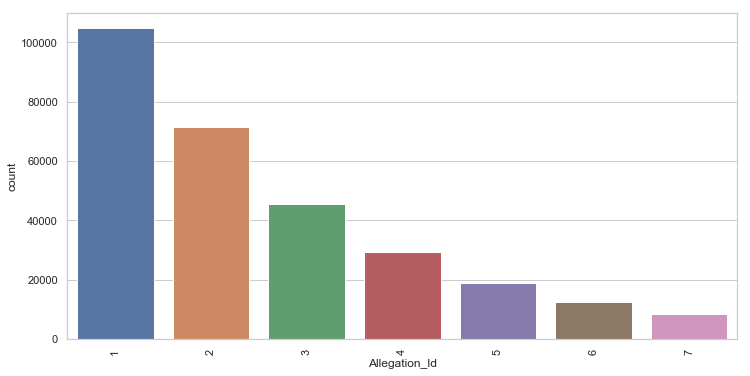

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='Allegation_Id', data=sam)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
sam= sam[sam['Allegation_Id' ]< 8]
sam 

,Allegation_Id,Allegation_FADO_Type,Allegation,Closed_Year,Days_From_Received_Date_To_Case_Closing,Re_opened,Ever_On_DA_Hold,Complaint_Outcome_Path,Complaint_Disposition,Allegation_Outcome_Path,Allegation_Disposition,Borough_Of_Incident,Patrol_Borough_Of_Incident
0,1,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,2,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,3,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
3,1,Discourtesy,Curse,2000,2433,False,False,Truncated,Complaint Withdrawn,Truncated,Complaint Withdrawn,Manhattan,Manhattan North
4,1,Discourtesy,Curse,2000,2445,False,False,Other,Miscellaneous,Other,Miscellaneous,Manhattan,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309255,1,Force,Chokehold,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309256,2,Force,Physical force,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309257,1,Offensive Language,Race,2017,25,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn South
309258,1,Discourtesy,Word,2017,14,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Bronx,Bronx


In [80]:
#sam = sam.apply (pd.to_numeric, errors='coerce')

sam=sam.dropna(axis=0, subset=['Allegation'])
print(sam.isnull().sum())

Allegation_Id                              0
Allegation_FADO_Type                       0
Allegation                                 0
Closed_Year                                0
Days_From_Received_Date_To_Case_Closing    0
Re_opened                                  0
Ever_On_DA_Hold                            0
Complaint_Outcome_Path                     0
Complaint_Disposition                      0
Allegation_Outcome_Path                    0
Allegation_Disposition                     0
Borough_Of_Incident                        0
Patrol_Borough_Of_Incident                 0
dtype: int64


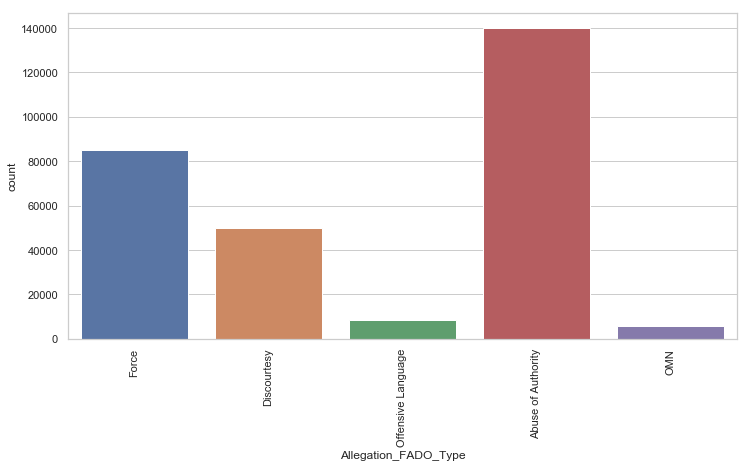

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='Allegation_FADO_Type', data=sam)
plt.xticks(rotation='vertical')
plt.show()

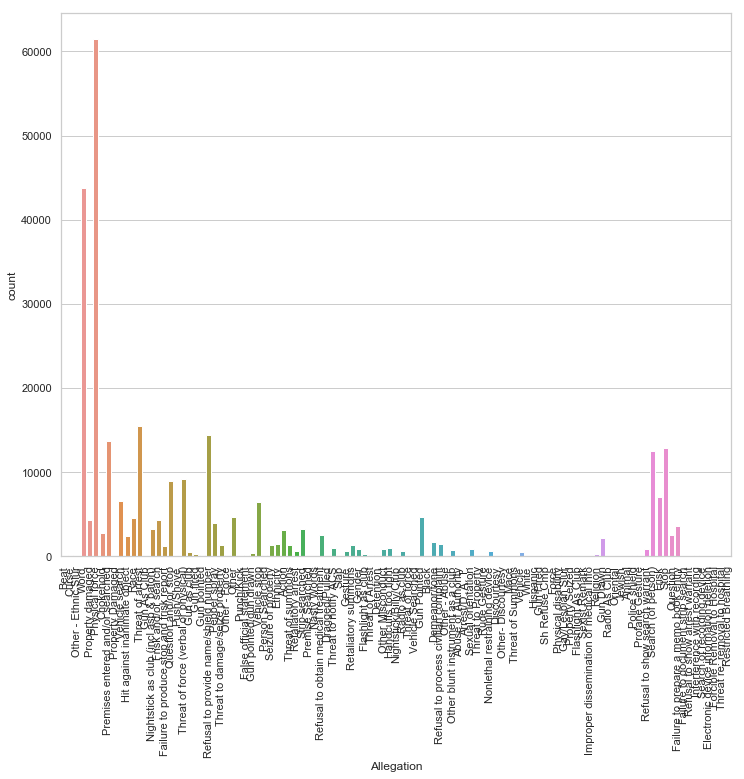

In [51]:
plt.figure(figsize=(12,10))
sns.countplot(x='Allegation', data=sam)
plt.xticks(rotation='vertical')
plt.show()

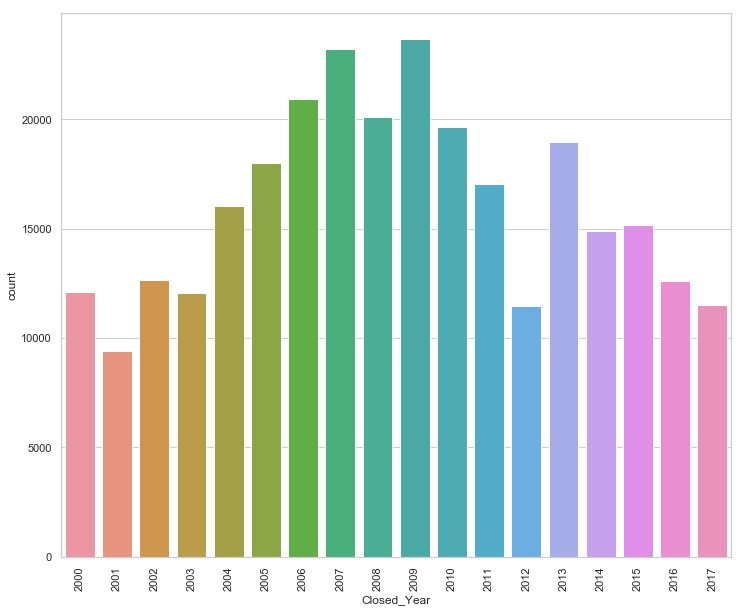

In [52]:
plt.figure(figsize=(12,10))
sns.countplot(x='Closed_Year', data=sam)
plt.xticks(rotation='vertical')
plt.show()

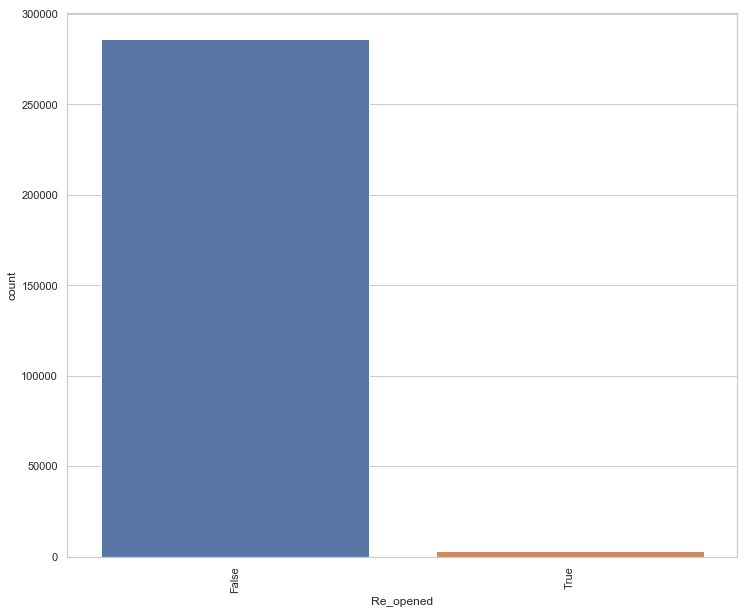

In [53]:
plt.figure(figsize=(12,10))
sns.countplot(x='Re_opened', data=sam)
plt.xticks(rotation='vertical')
plt.show()

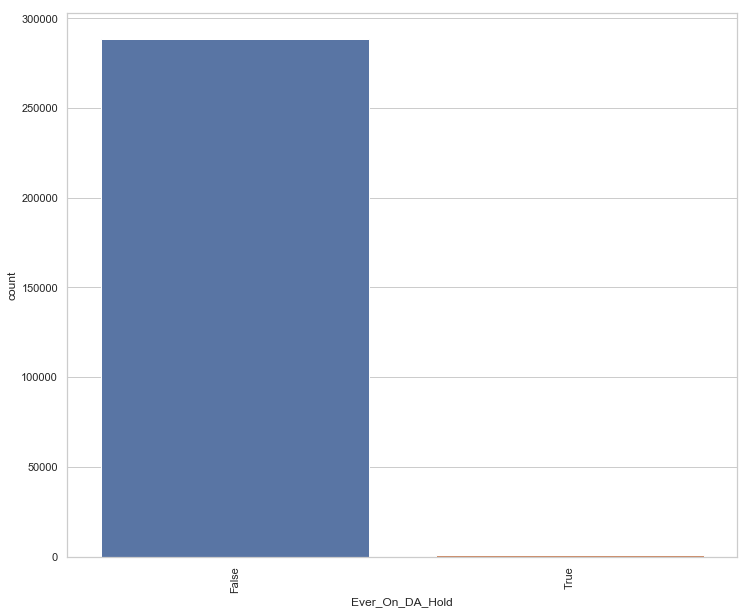

In [54]:
plt.figure(figsize=(12,10))
sns.countplot(x='Ever_On_DA_Hold', data=sam)
plt.xticks(rotation='vertical')
plt.show()

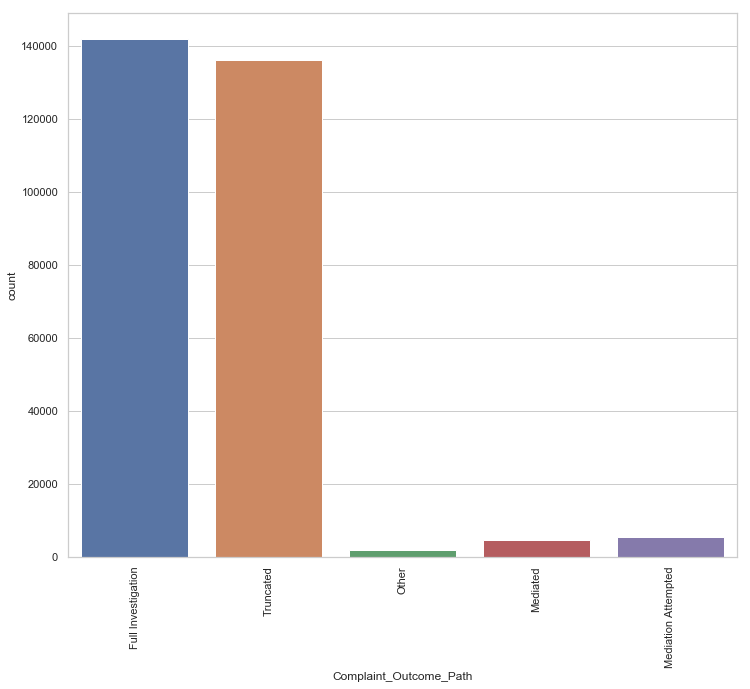

In [55]:
plt.figure(figsize=(12,10))
sns.countplot(x='Complaint_Outcome_Path', data=sam)
plt.xticks(rotation='vertical')
plt.show()

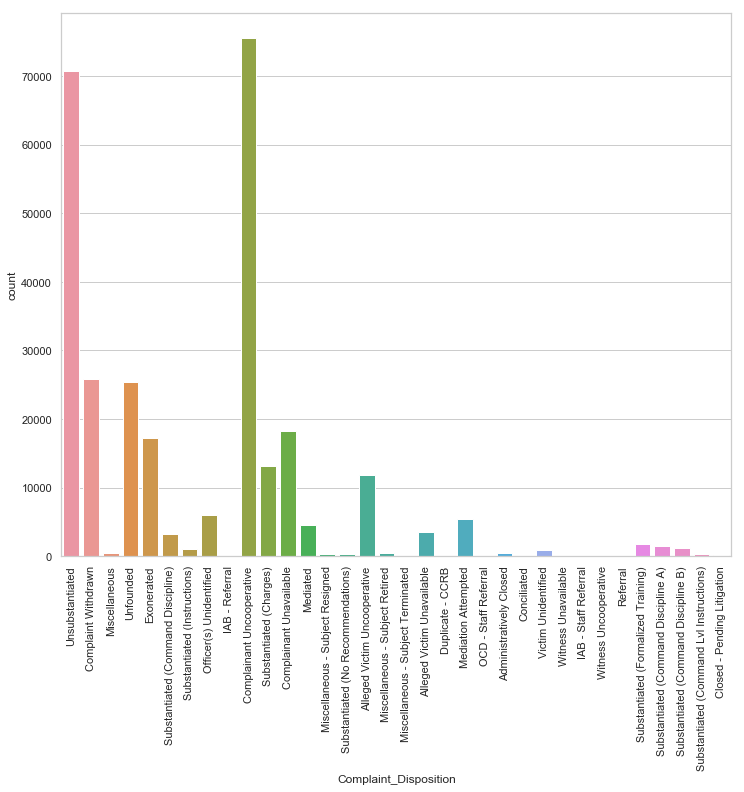

In [56]:
plt.figure(figsize=(12,10))
sns.countplot(x='Complaint_Disposition', data=sam)
plt.xticks(rotation='vertical')
plt.show()

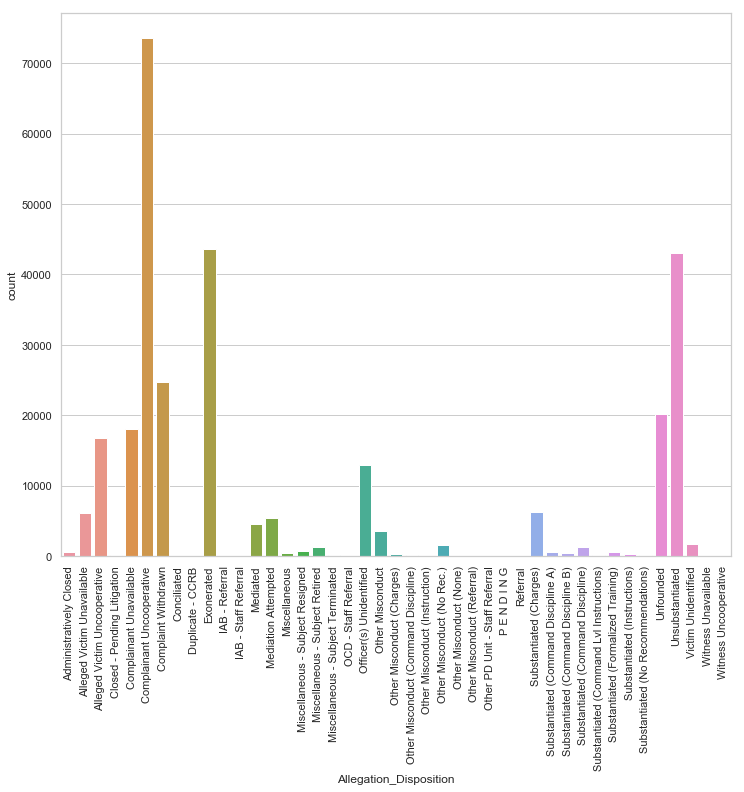

In [81]:
plt.figure(figsize=(12,10))
sns.countplot(x='Allegation_Disposition', data=sam)
plt.xticks(rotation='vertical')
plt.show()

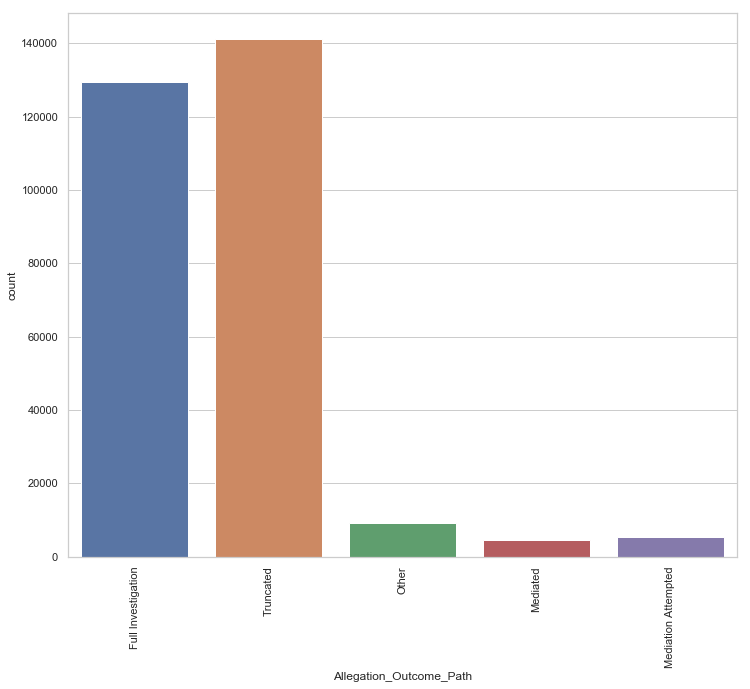

In [58]:
plt.figure(figsize=(12,10))
sns.countplot(x='Allegation_Outcome_Path', data=sam)
plt.xticks(rotation='vertical')
plt.show()

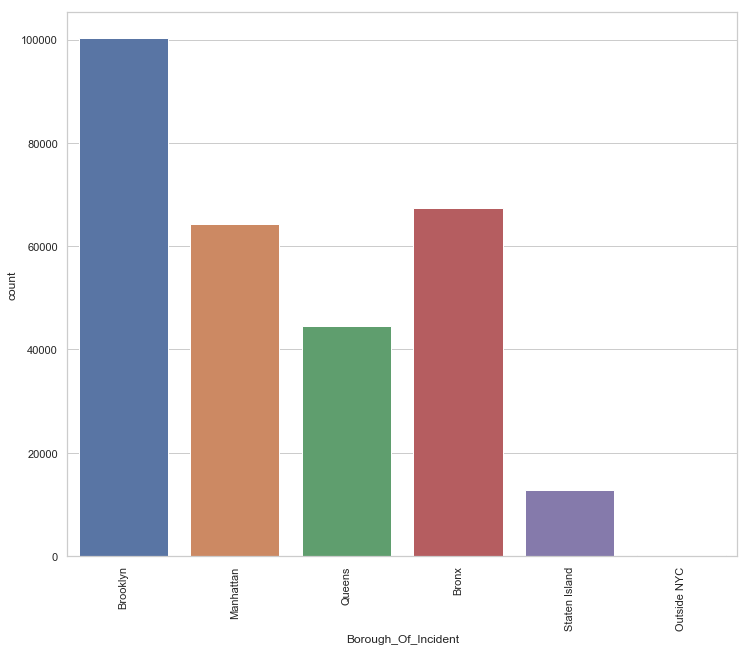

In [59]:
plt.figure(figsize=(12,10))
sns.countplot(x='Borough_Of_Incident', data=sam)
plt.xticks(rotation='vertical')
plt.show()

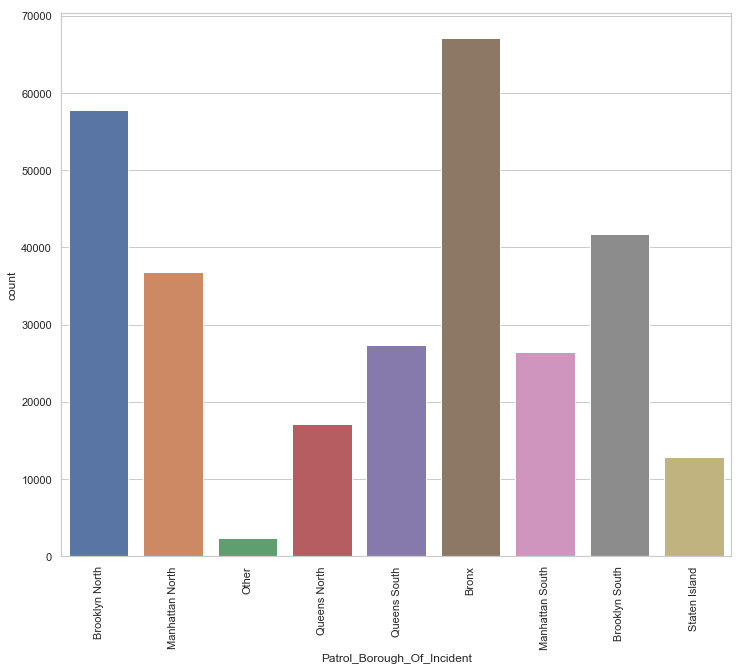

In [60]:
plt.figure(figsize=(12,10))
sns.countplot(x='Patrol_Borough_Of_Incident', data=sam)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))


In [ ]:
sam.dtypes

In [61]:
sam['Allegation_Id'].value_counts()

1    104221
2     71146
3     45359
4     29257
5     18831
6     12442
7      8317
Name: Allegation_Id, dtype: int64

In [62]:
sam['Allegation_FADO_Type'].value_counts()

Abuse of Authority    139901
Force                  85215
Discourtesy            50053
Offensive Language      8529
OMN                     5875
Name: Allegation_FADO_Type, dtype: int64

In [63]:
sam['Allegation'].value_counts()

Physical force                           61520
Word                                     43799
Threat of arrest                         15536
Refusal to provide name/shield number    14461
Premises entered and/or searched         13691
                                         ...  
Threat re: removal to hospital               1
Profane Gesture                              1
Jewish                                       1
Sexist Remark                                1
White                                        1
Name: Allegation, Length: 107, dtype: int64

In [64]:
sam['Complaint_Outcome_Path'].value_counts()

Full Investigation     141784
Truncated              136086
Mediation Attempted      5384
Mediated                 4522
Other                    1797
Name: Complaint_Outcome_Path, dtype: int64

In [65]:
sam['Complaint_Disposition'].value_counts()

Complainant Uncooperative                   75511
Unsubstantiated                             70759
Complaint Withdrawn                         25884
Unfounded                                   25341
Complainant Unavailable                     18257
Exonerated                                  17224
Substantiated (Charges)                     13212
Alleged Victim Uncooperative                11851
Officer(s) Unidentified                      5979
Mediation Attempted                          5384
Mediated                                     4522
Alleged Victim Unavailable                   3487
Substantiated (Command Discipline)           3241
Substantiated (Formalized Training)          1761
Substantiated (Command Discipline A)         1486
Substantiated (Command Discipline B)         1163
Substantiated (Instructions)                 1048
Victim Unidentified                           844
Administratively Closed                       520
Miscellaneous - Subject Retired               460


In [66]:

sam['Allegation_Outcome_Path'].value_counts()

Truncated              141181
Full Investigation     129410
Other                    9104
Mediation Attempted      5371
Mediated                 4507
Name: Allegation_Outcome_Path, dtype: int64

In [67]:

sam['Allegation_Disposition'].value_counts()

Complainant Uncooperative                   73517
Exonerated                                  43587
Unsubstantiated                             43096
Complaint Withdrawn                         24683
Unfounded                                   20127
Complainant Unavailable                     18105
Alleged Victim Uncooperative                16767
Officer(s) Unidentified                     12974
Substantiated (Charges)                      6224
Alleged Victim Unavailable                   6179
Mediation Attempted                          5371
Mediated                                     4507
Other Misconduct                             3510
Victim Unidentified                          1660
Other Misconduct (No Rec.)                   1582
Substantiated (Command Discipline)           1246
Miscellaneous - Subject Retired              1233
Miscellaneous - Subject Resigned              797
Substantiated (Formalized Training)           605
Substantiated (Command Discipline A)          553


In [68]:

sam['Borough_Of_Incident'].value_counts()

Brooklyn         100269
Bronx             67315
Manhattan         64240
Queens            44617
Staten Island     12853
Outside NYC         279
Name: Borough_Of_Incident, dtype: int64

In [69]:

sam['Patrol_Borough_Of_Incident'].value_counts()

Bronx              67058
Brooklyn North     57837
Brooklyn South     41765
Manhattan North    36781
Queens South       27347
Manhattan South    26467
Queens North       17118
Staten Island      12804
Other               2396
Name: Patrol_Borough_Of_Incident, dtype: int64

In [82]:

sam_feautres = sam[['Allegation_FADO_Type','Allegation','Complaint_Outcome_Path','Complaint_Disposition','Allegation_Outcome_Path'
                  ,'Allegation_Disposition','Borough_Of_Incident','Patrol_Borough_Of_Incident']]

In [71]:
sam.columns

Index(['Allegation_Id', 'Allegation_FADO_Type', 'Allegation', 'Closed_Year',
       'Days_From_Received_Date_To_Case_Closing', 'Re_opened',
       'Ever_On_DA_Hold', 'Complaint_Outcome_Path', 'Complaint_Disposition',
       'Allegation_Outcome_Path', 'Allegation_Disposition',
       'Borough_Of_Incident', 'Patrol_Borough_Of_Incident'],
      dtype='object')

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sam_feautres = sam_feautres.apply(le.fit_transform)
sam_feautres

,Allegation_FADO_Type,Allegation,Complaint_Outcome_Path,Complaint_Disposition,Allegation_Outcome_Path,Allegation_Disposition,Borough_Of_Incident,Patrol_Borough_Of_Incident
0,2,4,0,30,0,39,1,1
1,2,4,0,30,0,39,1,1
2,2,4,0,30,0,39,1,1
3,1,7,4,6,4,6,2,3
4,1,7,3,14,3,14,2,5
...,...,...,...,...,...,...,...,...
309255,2,6,4,5,4,5,4,7
309256,2,57,4,5,4,5,4,7
309257,4,69,4,5,4,5,1,2
309258,1,106,4,5,4,5,0,0


In [87]:
#sam_feautres.groupby(["Allegation", "Allegation_Id"]).count()

<Figure size 576x432 with 0 Axes>

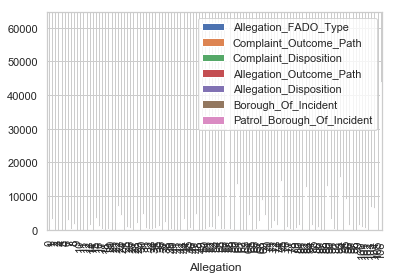

In [85]:
fig = plt.figure(figsize=(8,6))
sam_feautres.groupby('Allegation').count().plot.bar(ylim=0)
plt.show()

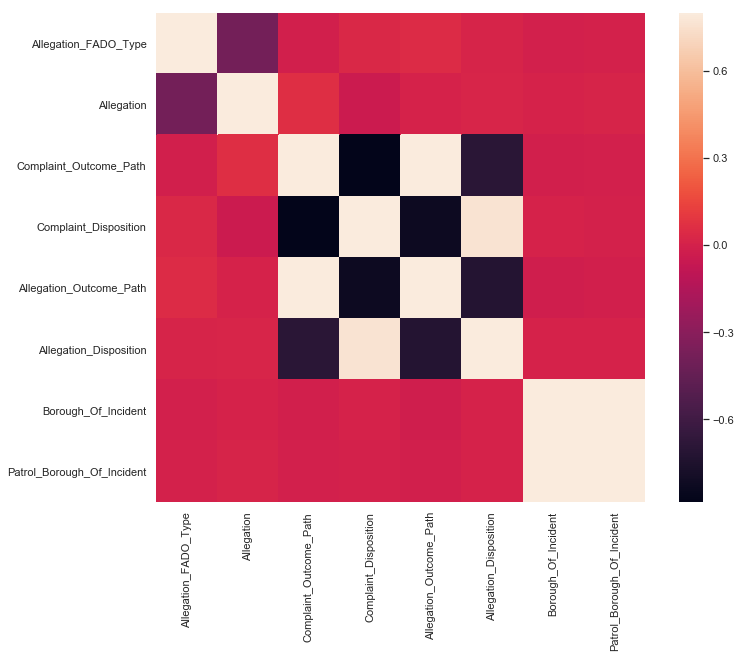

In [84]:
#correlation matrix
corrmat = sam_feautres.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

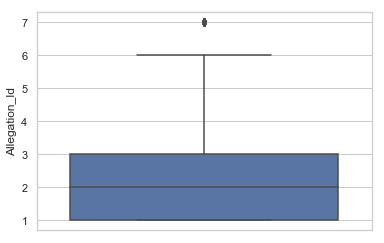

In [88]:
#sam.boxplot( column =['Allegation_Id'], grid = False) 
sns.set_style("whitegrid") 
  
sns.boxplot(y = 'Allegation_Id', data = sam) 

sam = sam.apply (pd.to_numeric, errors='coerce')

In [100]:
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(sam_feautres)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17708, cost: 1142311.0
Run 1, iteration: 2/100, moves: 0, cost: 1142311.0


In [101]:
fitClusters_cao

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [113]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = sam_feautres.columns

In [114]:
clusterCentroidsDf

,Allegation_FADO_Type,Allegation,Complaint_Outcome_Path,Complaint_Disposition,Allegation_Outcome_Path,Allegation_Disposition,Borough_Of_Incident,Patrol_Borough_Of_Incident
0,0,57,4,5,4,5,1,0
1,0,57,0,30,0,9,1,0


In [115]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(sam_feautres)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 100873, cost: 1142311.0
Run 1, iteration: 2/100, moves: 1246, cost: 1142311.0


In [116]:
fitClusters_huang

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [117]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(sam_feautres)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1515822.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17708, cost: 1142311.0
Run 1, iteration: 2/100, moves: 0, cost: 1142311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 31261, cost: 1054454.0
Run 1, iteration: 2/100, moves: 0, cost: 1054454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55149, cost: 985172.0
Run 1, iteration: 2/100, moves: 1718, cost: 985172.0


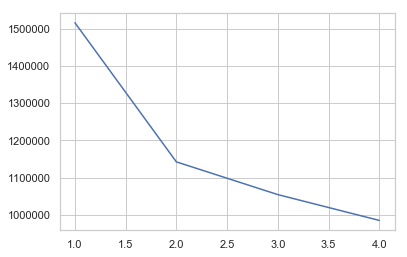

In [118]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
from sklearn.cluster import KMeans
cluster_mean =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(sam_feautres)
    cluster_mean.append(kmeans.inertia_)

In [110]:
sam_copy =sam.copy()


In [109]:
sam

,Allegation_Id,Allegation_FADO_Type,Allegation,Closed_Year,Days_From_Received_Date_To_Case_Closing,Re_opened,Ever_On_DA_Hold,Complaint_Outcome_Path,Complaint_Disposition,Allegation_Outcome_Path,Allegation_Disposition,Borough_Of_Incident,Patrol_Borough_Of_Incident
0,1,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
1,2,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
2,3,Force,Beat,2000,2817,False,False,Full Investigation,Unsubstantiated,Full Investigation,Unsubstantiated,Brooklyn,Brooklyn North
3,1,Discourtesy,Curse,2000,2433,False,False,Truncated,Complaint Withdrawn,Truncated,Complaint Withdrawn,Manhattan,Manhattan North
4,1,Discourtesy,Curse,2000,2445,False,False,Other,Miscellaneous,Other,Miscellaneous,Manhattan,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309255,1,Force,Chokehold,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309256,2,Force,Physical force,2017,90,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Queens,Queens South
309257,1,Offensive Language,Race,2017,25,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Brooklyn,Brooklyn South
309258,1,Discourtesy,Word,2017,14,False,False,Truncated,Complainant Uncooperative,Truncated,Complainant Uncooperative,Bronx,Bronx


In [103]:
sam_in= sam_copy.reset_index()

In [112]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([sam_in, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [106]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [107]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150647 entries, 3 to 289569
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   Allegation_Id                            150647 non-null  int64   
 1   Allegation_FADO_Type                     150647 non-null  category
 2   Allegation                               150647 non-null  category
 3   Closed_Year                              150647 non-null  int64   
 4   Days_From_Received_Date_To_Case_Closing  150647 non-null  int64   
 5   Re_opened                                150647 non-null  bool    
 6   Ever_On_DA_Hold                          150647 non-null  bool    
 7   Complaint_Outcome_Path                   150647 non-null  category
 8   Complaint_Disposition                    150647 non-null  category
 9   Allegation_Outcome_Path                  150647 non-null  category
 10  Allegation_Dispositi

In [108]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138923 entries, 0 to 289556
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   Allegation_Id                            138923 non-null  int64   
 1   Allegation_FADO_Type                     138923 non-null  category
 2   Allegation                               138923 non-null  category
 3   Closed_Year                              138923 non-null  int64   
 4   Days_From_Received_Date_To_Case_Closing  138923 non-null  int64   
 5   Re_opened                                138923 non-null  bool    
 6   Ever_On_DA_Hold                          138923 non-null  bool    
 7   Complaint_Outcome_Path                   138923 non-null  category
 8   Complaint_Disposition                    138923 non-null  category
 9   Allegation_Outcome_Path                  138923 non-null  category
 10  Allegation_Dispositi

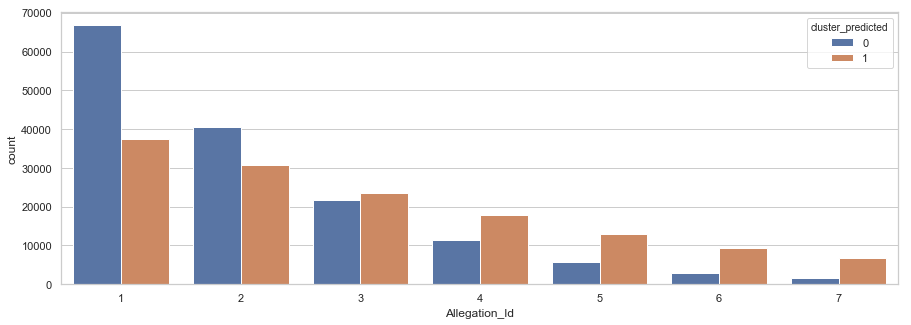

In [119]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Allegation_Id'],order=combinedDf['Allegation_Id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

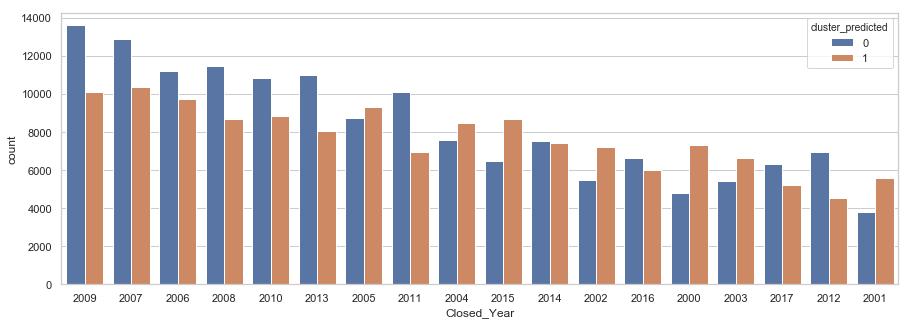

In [120]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Closed_Year'],order=combinedDf['Closed_Year'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

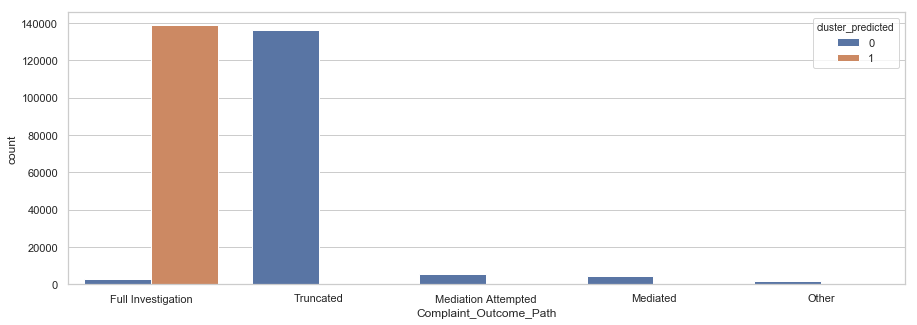

In [122]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Complaint_Outcome_Path'],order=combinedDf['Complaint_Outcome_Path'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

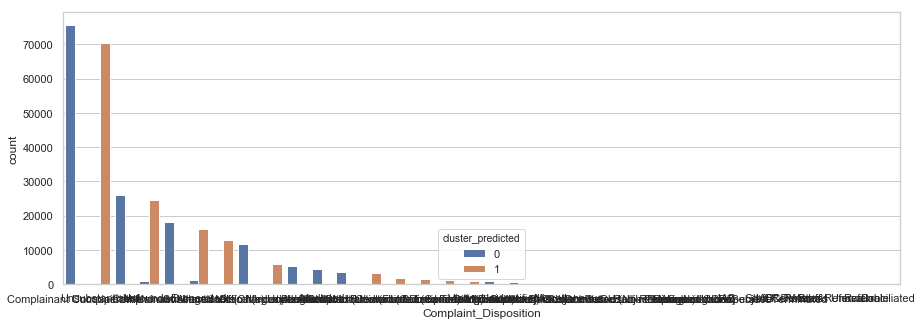

In [123]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Complaint_Disposition'],order=combinedDf['Complaint_Disposition'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

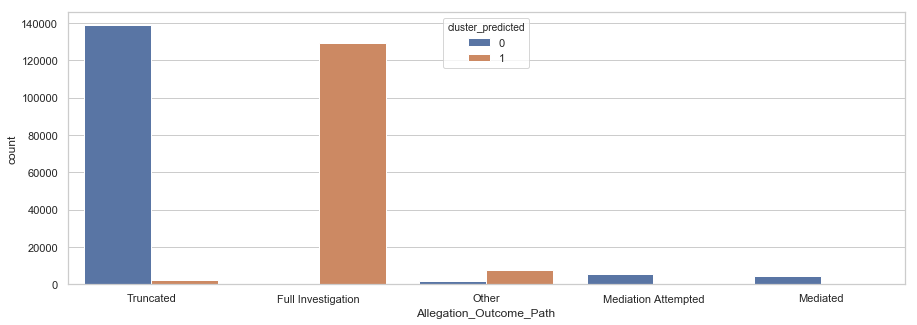

In [124]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Allegation_Outcome_Path'],order=combinedDf['Allegation_Outcome_Path'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

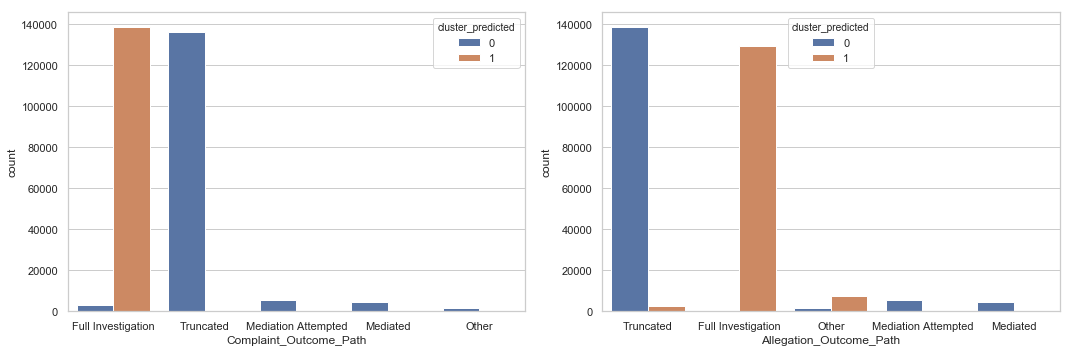

In [131]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['Complaint_Outcome_Path'],order=combinedDf['Complaint_Outcome_Path'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['Allegation_Outcome_Path'],order=combinedDf['Allegation_Outcome_Path'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
#sns.countplot(x=combinedDf['Patrol_Borough_Of_Incident'],order=combinedDf['Patrol_Borough_Of_Incident'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

In [ ]:
print(sam.isnull().sum())

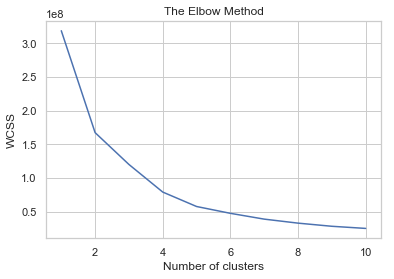

In [95]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(sam_feautres)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [99]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(sam_feautres)

print(Y_Kmeans)

[3 3 3 ... 0 1 1]


In [94]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=100000, centers=3, n_features=4)

df = pd.DataFrame(X, columns=['Complaint_Outcome_Path', 'Complaint_Disposition', 'Borough_Of_Incident', 'Allegation_Disposition'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['Complaint_Outcome_Path', 'Complaint_Disposition', 'Borough_Of_Incident', 'Allegation_Disposition']])

df['Cluster'] = y

print(df.head())

   Complaint_Outcome_Path  Complaint_Disposition  Borough_Of_Incident  \
0               10.969877              -9.750387            -9.625287   
1               11.040009              -9.018755            -9.944586   
2               -8.390468              10.308011            -8.793852   
3               -0.895246              -1.798265             2.418187   
4               -0.060025              -2.500845             4.212878   

   Allegation_Disposition  Cluster  
0               -0.329767        1  
1               -1.490089        1  
2                1.577106        0  
3               -3.124019        2  
4               -2.414177        2  


In [ ]:
df['Cluster'].value_counts()

In [ ]:
import matplotlib.pyplot as plot
plot.scatter(X[y == 0,0], X[y==0,1], s=25, c='red', label='Cluster 1')
plot.scatter(X[y == 1,0], X[y==1,1], s=25, c='blue', label='Cluster 2')
plot.scatter(X[y == 2,0], X[y==2,1], s=25, c='magenta', label='Cluster 3')
plot.scatter(X[y == 3,0], X[y==3,1], s=25, c='cyan', label='Cluster 4')

plot.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow', label='Centroid')
plot.title('KMeans Clustering')
plot.xlabel('Acousticness')
plot.ylabel('Danceability')
plot.legend()
plot.show()

In [ ]:
sam.head()

In [ ]:
plt.style.use('fivethirtyeight')
WRegularSeasonCompactResults['counter'] = 1
WRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='Most Winning (Regular Season) Womens Teams',
          figsize=(15, 8),
          xlim=(400, 680),
          color=mypal[0])
plt.show()

In [ ]:
numeric varibales(UniqueRandomComplaintId	Allegation_Id	Closed_Year	Days_From_Received_Date_To_Case_Closing)